In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

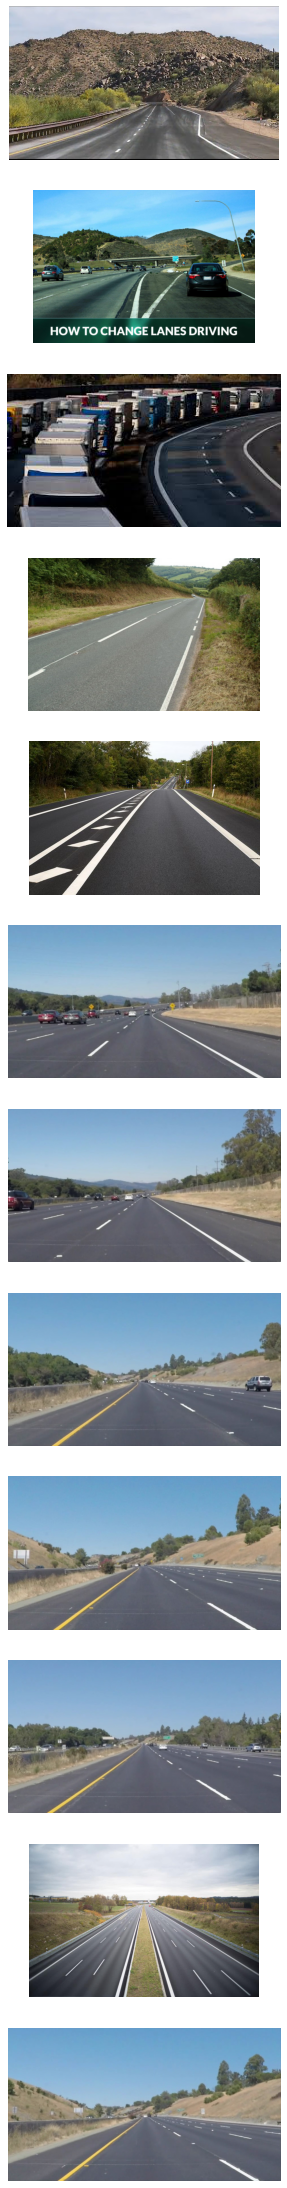

In [3]:
test_images = []
for filename in os.listdir('./test_images'):
    if "jpg" in filename or "jpeg" in filename:
        test_images.append(plt.imread('./test_images/'+filename))

number_of_images = len(test_images)
fig, axs = plt.subplots(number_of_images, 1)
fig.set_figwidth(40)
fig.set_figheight(40)
for idx, ax in enumerate(axs):
    ax.imshow(test_images[idx])
    ax.axis(False)

In [4]:
import math
def rgb_to_hsi(rgb_pixel):
    red = rgb_pixel[0]/256.
    green = rgb_pixel[1]/256.
    blue = rgb_pixel[2]/256.
    i = min(red, green, blue)
    delta = 1 if max(red, green , blue) ==0 else 0 
    s = 1 - (3*min(red, green, blue)/(red+green+blue + 0.0001))
    dom = (np.sqrt(((red-green)**2 + (red-blue)*(green-blue))) + delta)
    dom = 1 if dom == 0 else dom
    theta = math.acos((0.5*(2*red - green- blue))/ dom)
    h = theta if blue <= green else 2*math.pi - theta
    return [h, s, i]

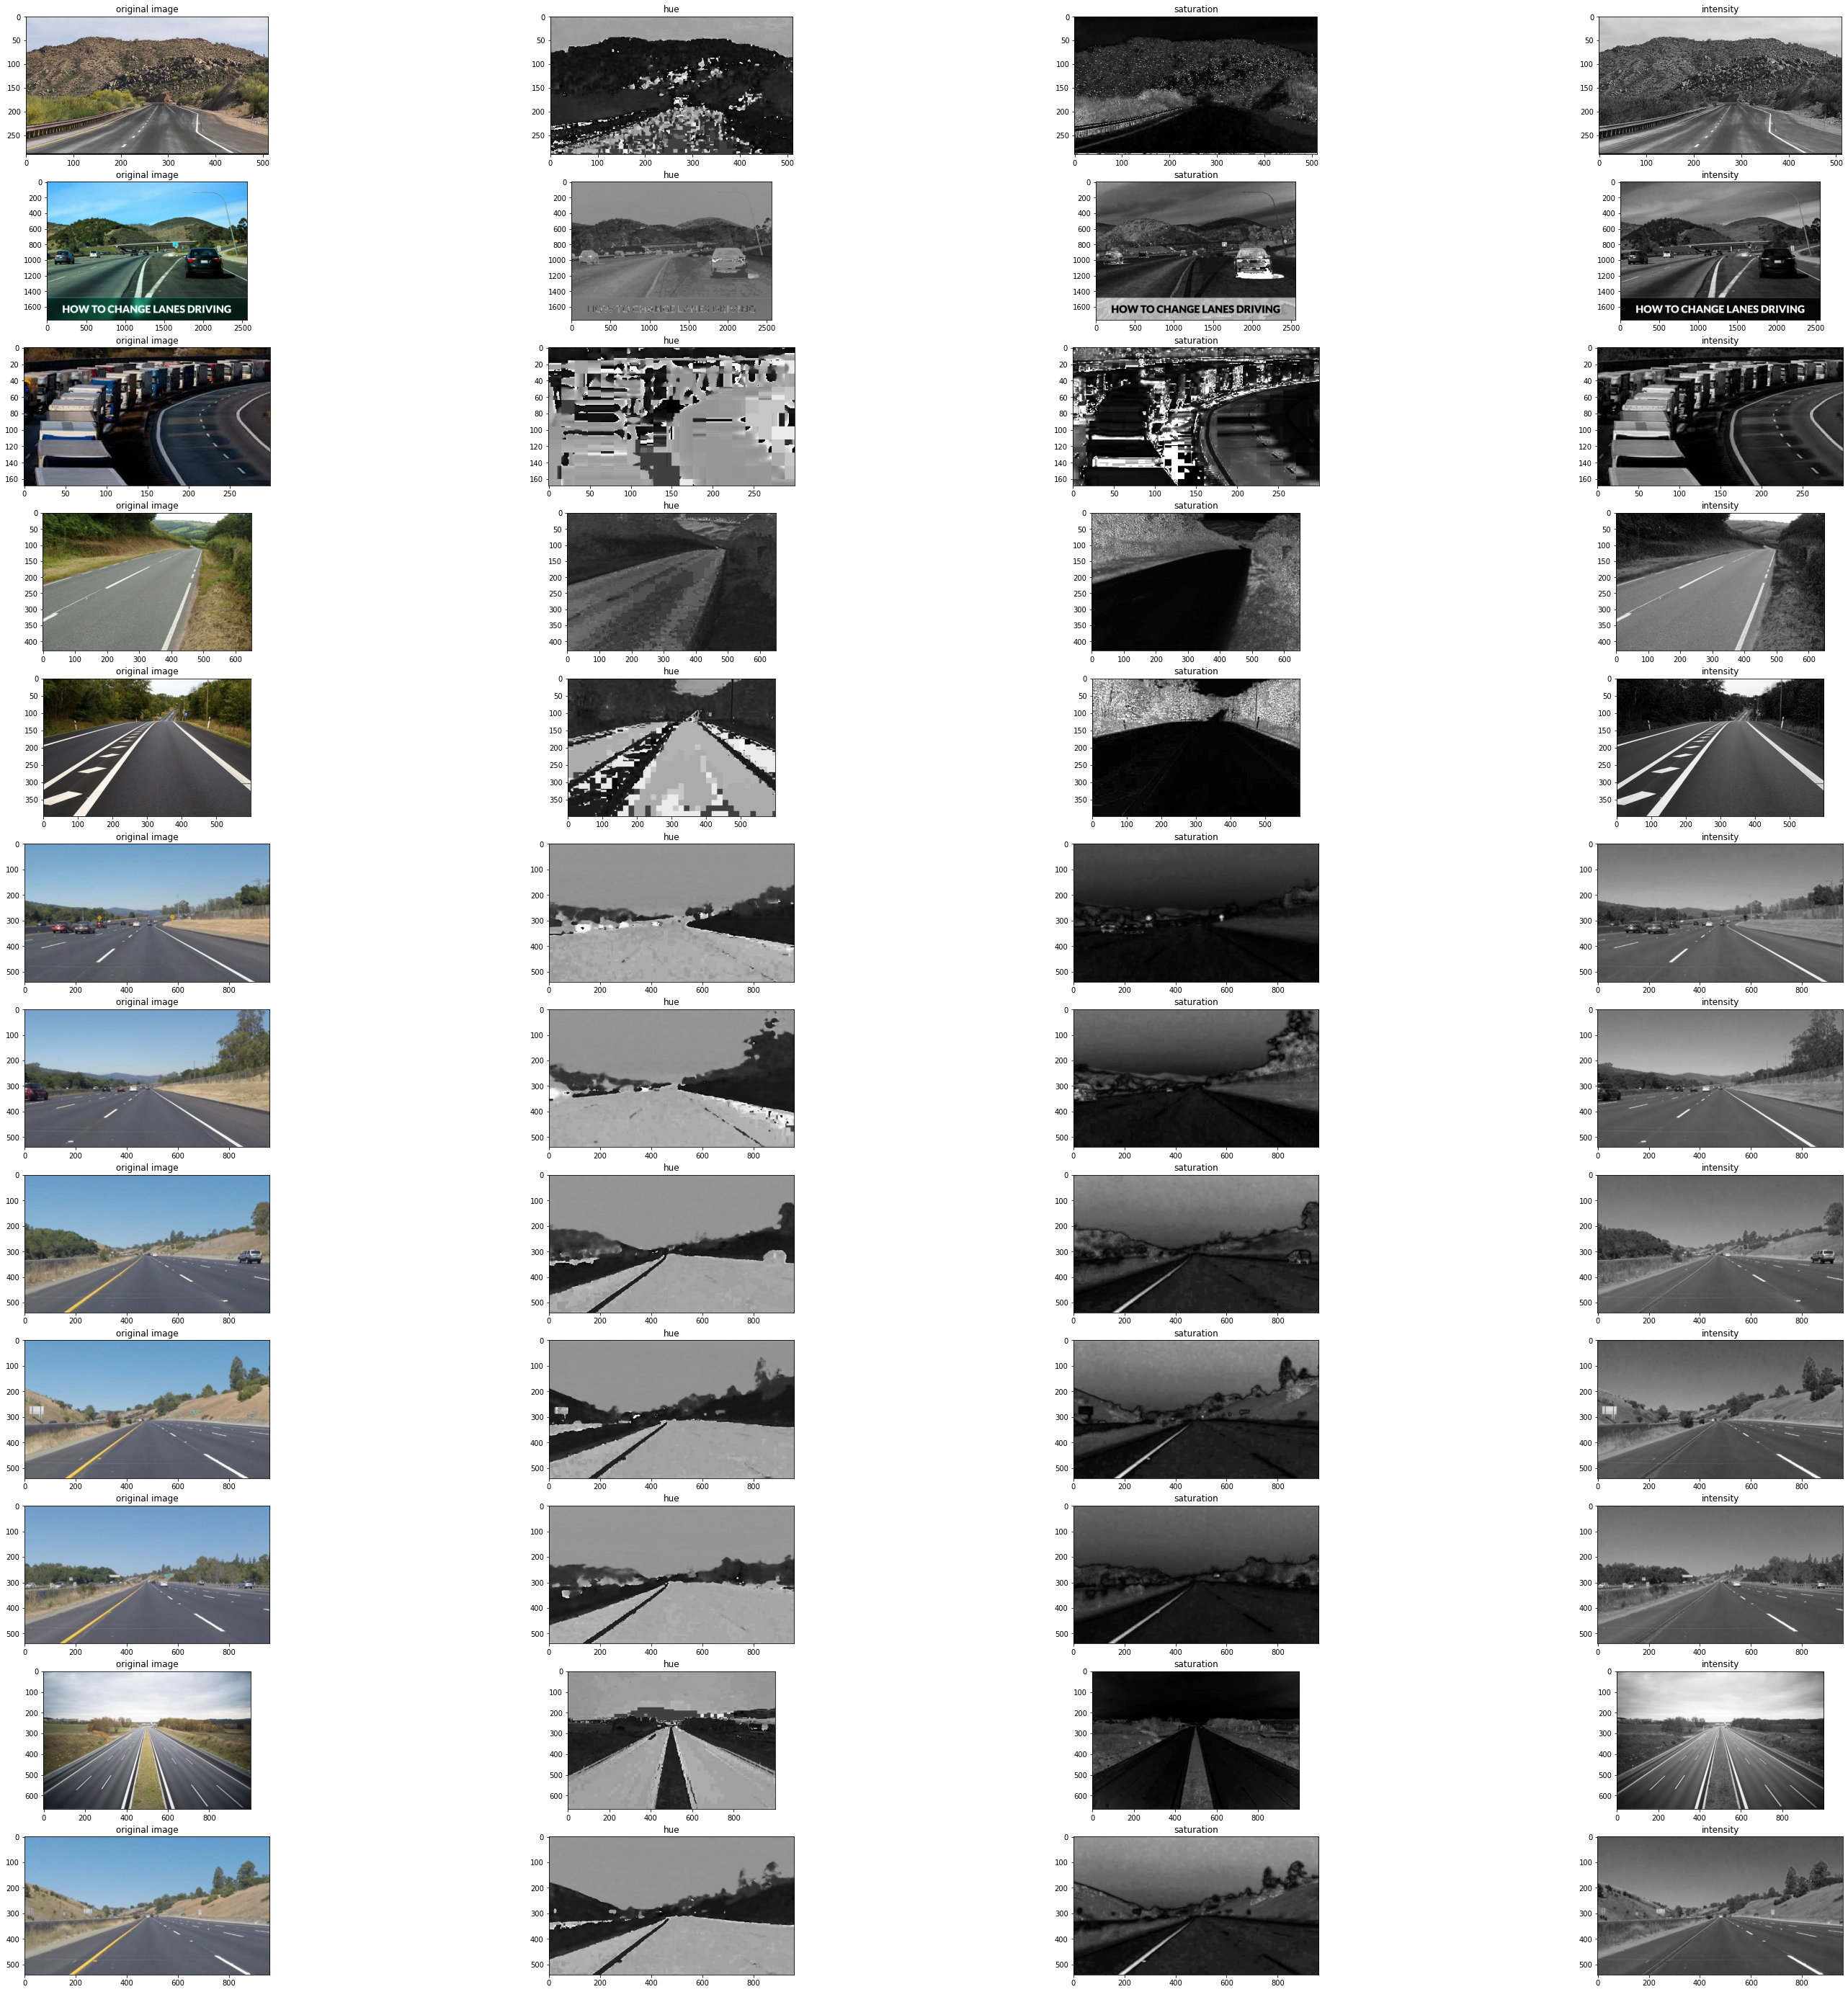

In [5]:
fig, axs = plt.subplots(number_of_images, 4)
fig.set_figheight(50)
fig.set_figwidth(50)
hsi_images = []
for img, ax in zip(test_images, axs):
    ax[0].imshow(img)
    ax[0].set_title("original image")
    hsi_img = np.apply_along_axis(rgb_to_hsi, -1, img)
    hsi_images.append(hsi_img)
    titles = ['hue', 'saturation', 'intensity']
    for i in range(1,4):
        ax[i].imshow(hsi_img[:,:,i-1], cmap='gray')
        ax[i].set_title(titles[i-1])


In [6]:
hsi = np.apply_along_axis(rgb_to_hsi, -1, test_images[0])
hue = hsi[:, :, 0]
sat = hsi[:, :, 1]
intensity = hsi[:,:,2]


In [23]:
### White lane markings thesholding 
lower_hue_threshold = 0.
upper_hue_threshold = 3.#.0005

intensity_theshold = .85
### Yellow lane markings thresholding
lower_sat_threshold = .8
upper_sat_threshold = 1.


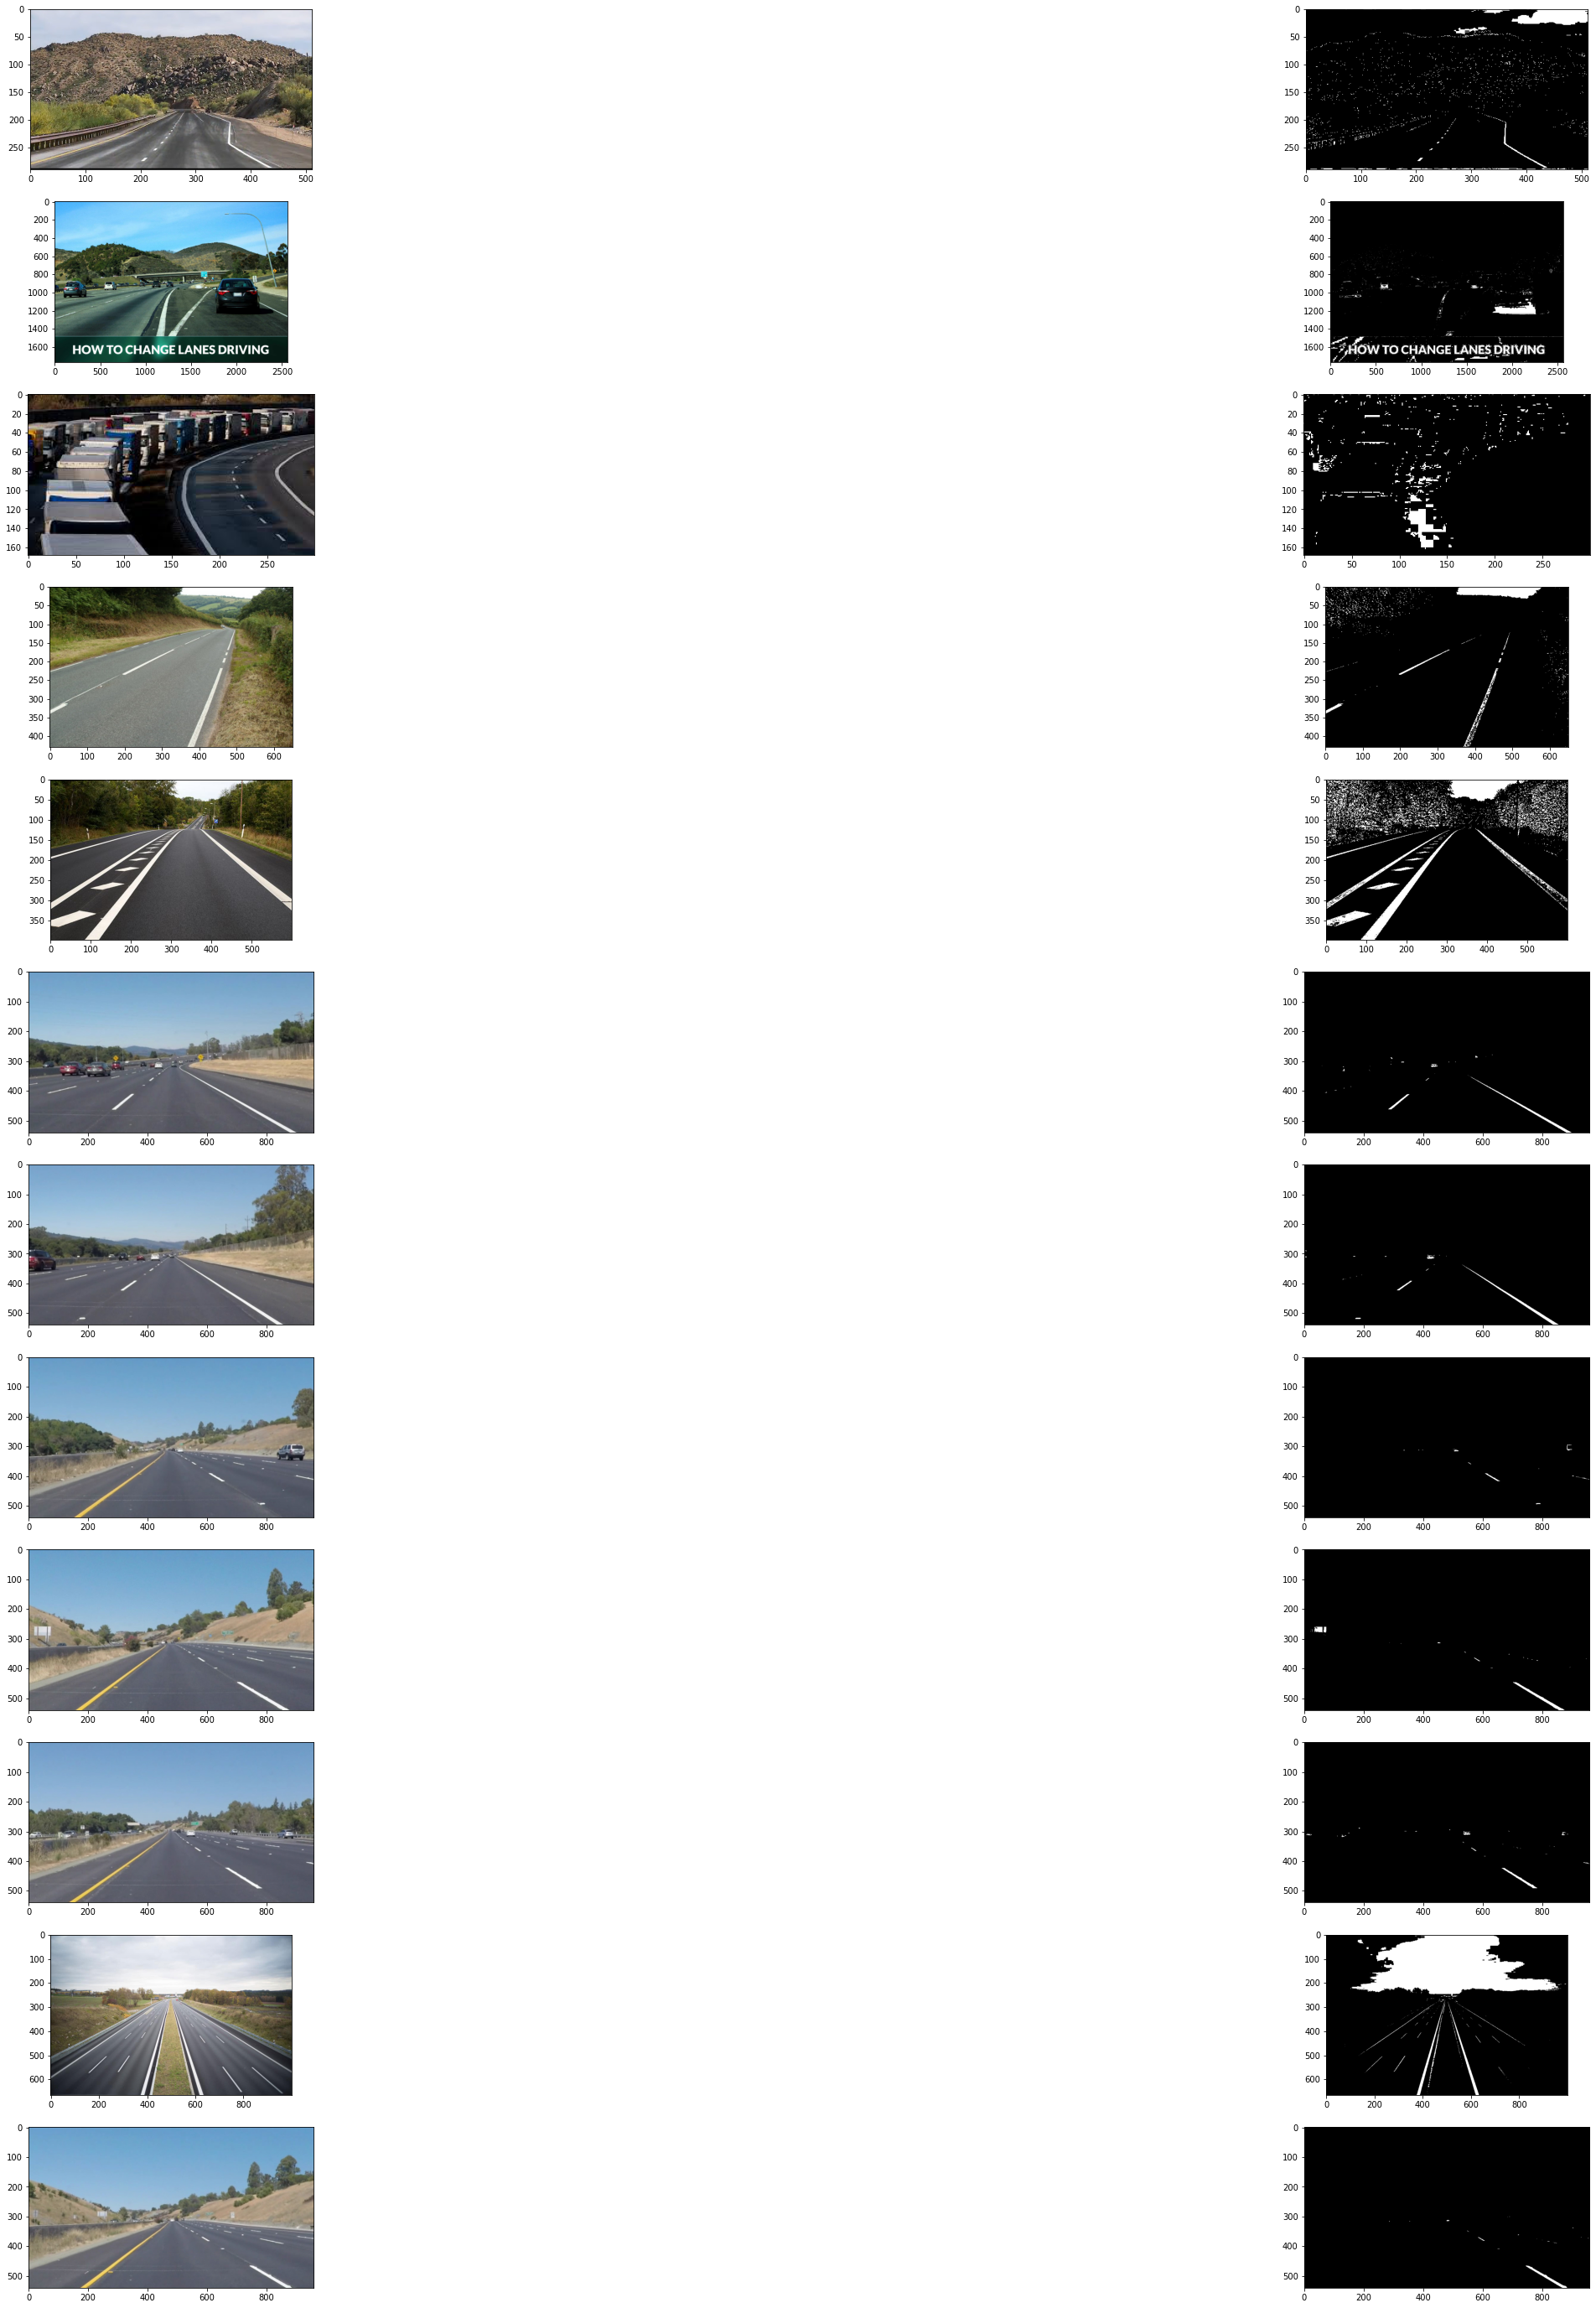

In [24]:
fig, axs = plt.subplots(number_of_images, 2)
fig.set_figheight(50)
fig.set_figwidth(50)

for idx, ax in enumerate(axs):
    #hsi = np.apply_along_axis(rgb_to_hsi, -1, img)
    img = hsi_images[idx]
    hue = img[:, :, 0]
    sat = img[:, :, 1]
    intensity = img[:,:,2]
    white_lane_mask = np.bitwise_and((sat < upper_sat_threshold), (intensity > intensity_theshold))
    yellow_lane_mask = np.bitwise_and((sat > lower_sat_threshold), np.bitwise_and(hue > lower_hue_threshold, hue < upper_hue_threshold))

    mask = np.bitwise_or(white_lane_mask, yellow_lane_mask)
    copied = np.copy(img)
    copied[mask] = 1.
    copied[~mask] = 0.
    ax[0].imshow(test_images[idx])
    ax[1].imshow(copied, cmap='gray')
    

